<a href="https://colab.research.google.com/github/Devabhakthuni-Bhavani/CI-CD/blob/main/Skill1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
df=pd.read_csv("/content/bbc_news_text_complexity_summarization.csv")

In [4]:
print(df.head(10))

                                                text    labels  no_sentences  \
0  Ad sales boost Time Warner profit\n\nQuarterly...  business            26   
1  Dollar gains on Greenspan speech\n\nThe dollar...  business            17   
2  Yukos unit buyer faces loan claim\n\nThe owner...  business            14   
3  High fuel prices hit BA's profits\n\nBritish A...  business            24   
4  Pernod takeover talk lifts Domecq\n\nShares in...  business            17   
5  Japan narrowly escapes recession\n\nJapan's ec...  business            13   
6  Jobs growth still slow in the US\n\nThe US cre...  business            15   
7  India calls for fair trade rules\n\nIndia, whi...  business            16   
8  Ethiopia's crop production up 24%\n\nEthiopia ...  business            15   
9  Court rejects $280bn tobacco case\n\nA US gove...  business            10   

   Flesch Reading Ease Score  Dale-Chall Readability Score  \
0                      62.17                          9.7

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:
def preprocess(text):
  text=text.lower()
  text=re.sub(r'\d+','',text)
  text=text.translate(str.maketrans('','',string.punctuation))
  text=text.strip()
  tokens=text.split()
  stop_words=set(stopwords.words('english'))
  tokens=[word for word in tokens if word not in stop_words]
  lemmatizer=WordNetLemmatizer()
  tokens=[lemmatizer.lemmatize(word) for word in tokens]
  return ' '.join(tokens)


In [7]:
df['text']=df['text'].apply(preprocess)
df['text']

,text
0,ad sale boost time warner profit quarterly pro...
1,dollar gain greenspan speech dollar hit highes...
2,yukos unit buyer face loan claim owner embattl...
3,high fuel price hit ba profit british airway b...
4,pernod takeover talk lift domecq share uk drin...
...,...
2122,new console promise big problem making game fu...
2123,bt program beat dialler scam bt introducing tw...
2124,careful code new european directive could put ...
2125,u cyber security chief resigns man making sure...


In [8]:
x=df['text']
y=df['labels']

In [9]:
print(df.columns)

Index(['text', 'labels', 'no_sentences', 'Flesch Reading Ease Score',
       'Dale-Chall Readability Score', 'text_rank_summary', 'lsa_summary'],
      dtype='object')


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [12]:
model=MultinomialNB()
model.fit(x_train_tfidf,y_train)

MultinomialNB()

In [13]:
y_pred=model.predict(x_test_tfidf)

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)



Accuracy: 0.9530516431924883
F1 Score: 0.9522258508589813
Recall: 0.9530516431924883
Classification Report:
                precision    recall  f1-score   support

     business       0.96      0.98      0.97       104
entertainment       0.98      0.82      0.90        78
     politics       0.88      1.00      0.94        73
        sport       0.97      1.00      0.98        98
         tech       0.97      0.95      0.96        73

     accuracy                           0.95       426
    macro avg       0.95      0.95      0.95       426
 weighted avg       0.96      0.95      0.95       426

Confusion Matrix:
 [[102   0   0   0   2]
 [  1  64  10   3   0]
 [  0   0  73   0   0]
 [  0   0   0  98   0]
 [  3   1   0   0  69]]


In [35]:
import pandas as pd
df=pd.read_csv("/content/bbc_news_text_complexity_summarization.csv")
print(df.shape)

(2127, 7)


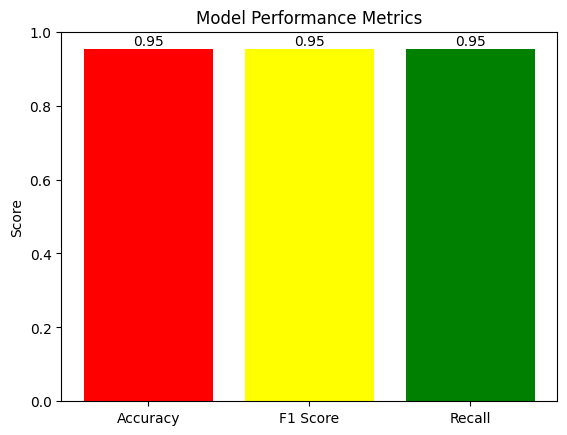

In [37]:
import matplotlib.pyplot as plt

metrics = [acc, f1, recall,]
labels = ['Accuracy', 'F1 Score', 'Recall']

plt.bar(labels, metrics, color=['red', 'yellow', 'green'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


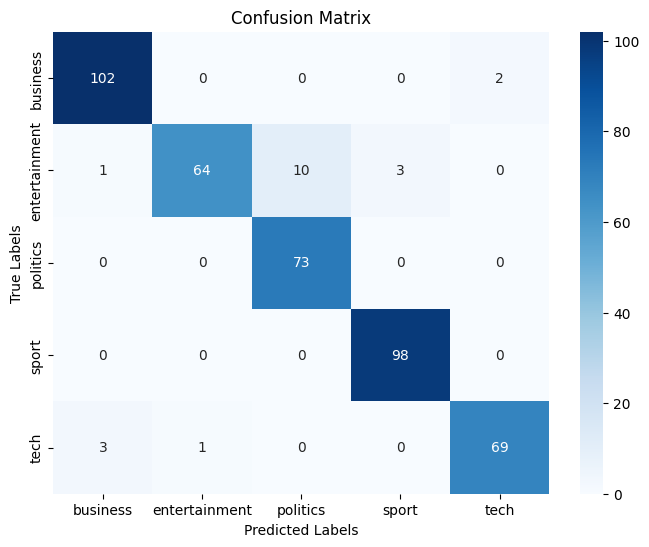

In [38]:
import seaborn as sns

import numpy as np
class_names = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [41]:
df = pd.read_csv('/content/bbc_news_text_complexity_summarization.csv')
df.head()


,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...
